In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [2]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Fall2018/ML/datasets/forestfires.csv')
#Temp,RH,Wind
X = dataset.iloc[:, [8,10]].values

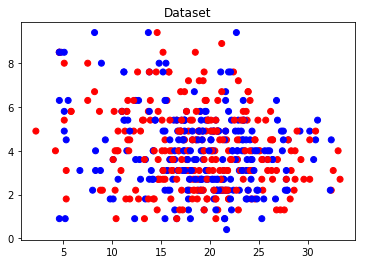

In [3]:
x = dataset.iloc[:, [8,10]].values
plt.scatter(dataset.iloc[:,8],dataset.iloc[:,10],color=['red','blue'])
plt.title('Dataset')
plt.show()

In [4]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
#X, y_true=make_blobs(n_samples=400, centers=4,
                       #cluster_std=0.60, random_state=0)
#X = X[:, ::-1] # flip axes for better plotting

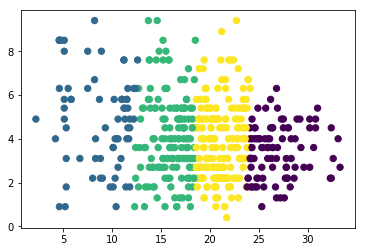

In [5]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

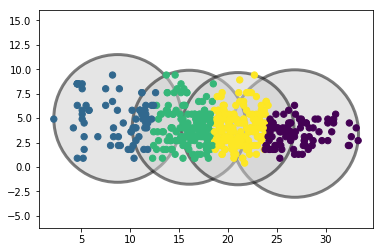

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

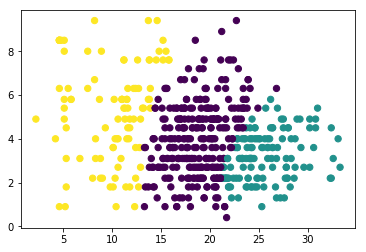

In [8]:
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

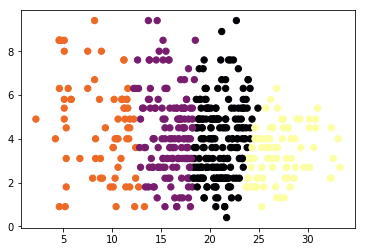

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='inferno');

In [10]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.009 0.991 0.   ]
 [0.424 0.527 0.028 0.021]
 [0.048 0.706 0.243 0.003]
 [0.    0.009 0.991 0.   ]
 [0.001 0.16  0.839 0.   ]]


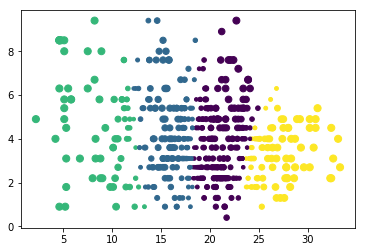

In [11]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [12]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

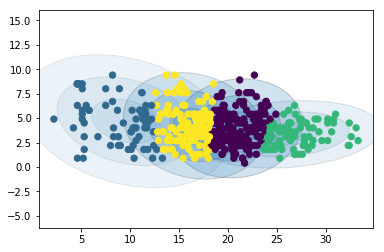

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

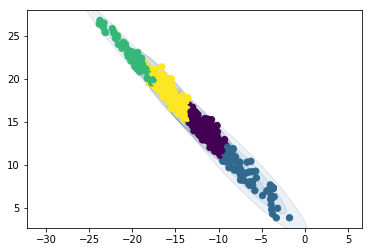

In [14]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

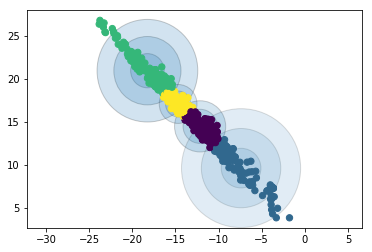

In [15]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
plot_gmm(gmm, X_stretched)

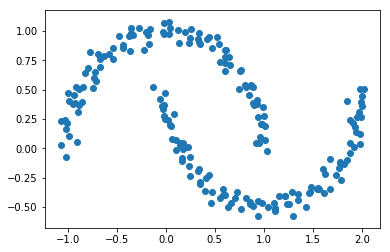

In [16]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200,noise =0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

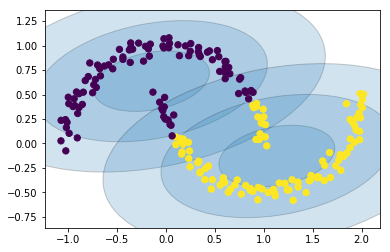

In [17]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

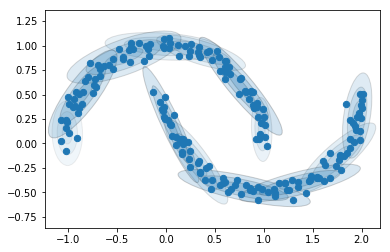

In [18]:
gmm16 = GaussianMixture(n_components=13, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

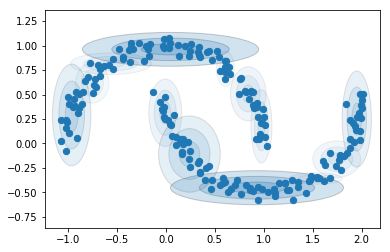

In [19]:
gmm16 = GaussianMixture(n_components=13, covariance_type='diag', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

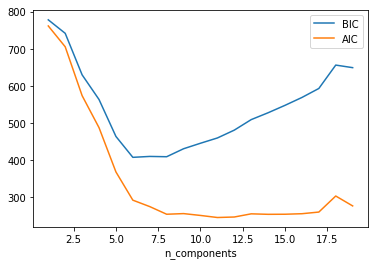

In [20]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [21]:
# From AIC it can be known that the n_components can be between 10 to 12 and 
# From BIC which is much simpler model it can be seen that n_components is 6.

# So we are re-plotting with k=6 to understand how the clustering comes together.

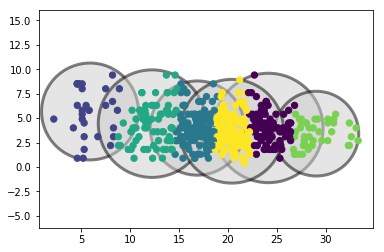

In [22]:
kmeans = KMeans(n_clusters=6, random_state=0)
plot_kmeans(kmeans, X)

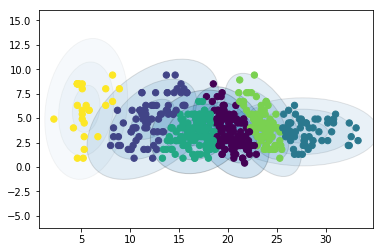

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, random_state=42)
plot_gmm(gmm, X)

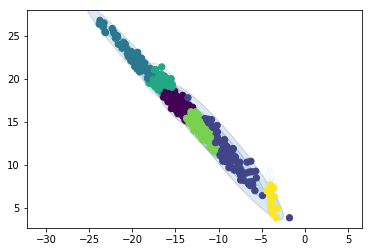

In [24]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

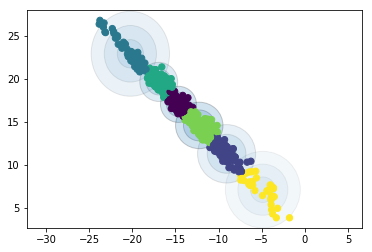

In [25]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
plot_gmm(gmm, X_stretched)

In [26]:
# Hierarchial clustering of forest fire data 
import pandas as pd

# remove the grain species from the DataFrame, save for later
varieties = list(dataset.pop('wind'))

# extract the measurements as a NumPy array
samples = dataset.values

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [28]:
mergings = linkage(samples, method='complete')

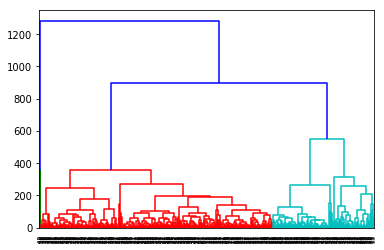

In [29]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
)
plt.show()

In [30]:
# Using Hierarchial clustering  we can broadly classify the data as 2  distinct hierarchial clusters.